# MASS ODE SYSTEM

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

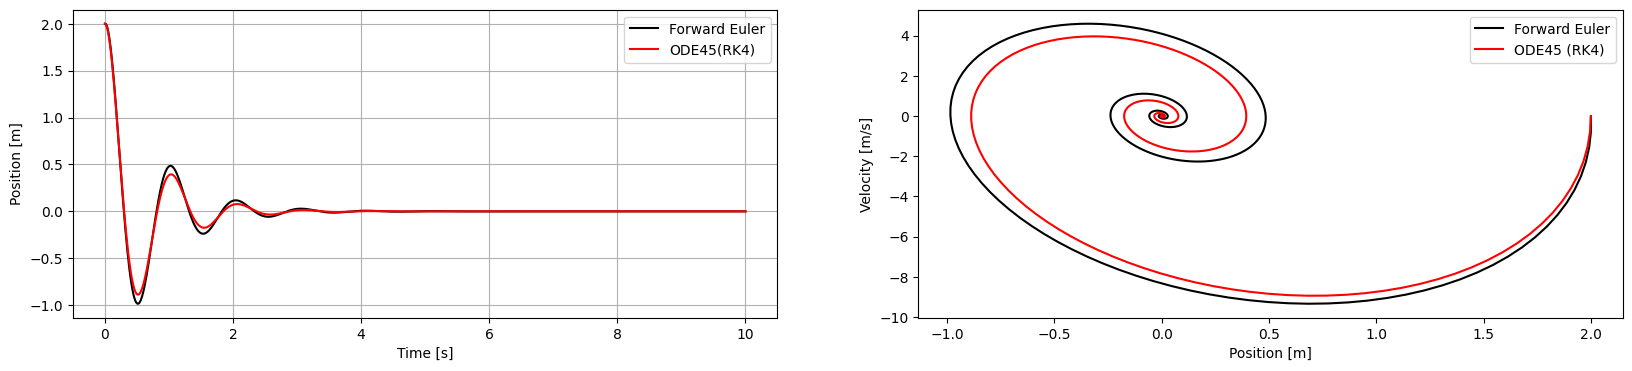

In [21]:
w = 2 * np.pi   # Natural frequency
d = 0.25    # damping ratio

A = np.array([[0, 1], [-w ** 2, -2 * d * w]])     # x' = Ax
dt = 0.01   # time steps
T = 10      # amount of time to integrate
n = int(T/dt)
t = np.linspace(0, T, n)

x0 = [2, 0]     # initial condition [x = 2, v = 0]

# iterate forward euler
xF = np.zeros((2, n))
xF[:, 0] = x0
for k in range(n - 1):
    xF[:, k+1] = (np.eye(2) + dt * A) @ xF[:, k]


# compute better integral using built-in python code 
# 4th-order Runge kutta

def linear_ode (t, x):
    return A @ x

linear_ode_solution = solve_ivp(linear_ode, (0, T), x0, t_eval=t)
xGood = linear_ode_solution.y

plt.figure(figsize=(20, 4))
plt.subplot(1, 2, 1)
plt.plot(t, xF[0, :], 'k')
plt.plot(t, xGood[0, :], 'r')
plt.xlabel('Time [s]')
plt.ylabel('Position [m]')
plt.legend(['Forward Euler', 'ODE45(RK4)'])
plt.grid(True)


plt.subplot(1, 2, 2)
plt.plot(xF[0, :], xF[1, :], 'k')
plt.plot(xGood[0, :], xGood[1, :], 'r')
plt.xlabel('Position [m]')
plt.ylabel('Velocity [m/s]')
plt.legend(['Forward Euler', 'ODE45 (RK4)'])

